<a href="https://colab.research.google.com/github/marthaakinlolu/DataScience/blob/main/my_mobapp_studio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from pandas.plotting import scatter_matrix

**Load Data**

In [ ]:
def load_dataset(csvfile):
  return pd.read_csv(csvfile)

In [ ]:
dataset = load_dataset("googleplaystore.csv")
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Analysis**

In [ ]:
def print_summarize_dataset(dataset):
  print("The Dimension/Size of the Data")
  print(dataset.shape)
  print("\nThe Summary Information of the Data")
  print(dataset.info())
  print("\nChecking for missing data")
  print(dataset.isnull().sum())
  print("\nThe Statistical Summary of the Data")
  print(dataset.describe())
  print(dataset.describe(include= "O")) # for object datatypes
print_summarize_dataset(dataset)

The Dimension/Size of the Data
(10841, 13)

The Summary Information of the Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None

Checking for missing data
App                  0
Category             0
Ratin

The dimension/size of the data is 10841 rows and 13 columns. 

The summary information of the data shows the names, non-null count and datatype of each column. 

There are missing values in some of the features, particularly in the rating column where 1,474 entries are missing.

The Rating column is the only column with numerical values, which is why we were able to get statistical results only for that column. The count, mean, standard deviation, and other statistical measures for the Rating column are also provided in the statistical summary.
Then, we had to check for the summary of object datatypes showing count, unique, top and frequency.

The statistical summary of the data shows that the mean rating of the apps is 4.19, with a minimum rating of 1 and a maximum rating of 19, which is an outlier. The majority of the apps are free, with only 93 apps being paid. The most frequent category is family, with 1,972 entries, while the most frequent genre is tools with 842 entries. The data set contains apps with varying sizes and required Android versions.

In [ ]:
def convert_size(size_str):
    if size_str[-1] == 'K':
        return float(size_str[:-1]) / 1024
    elif size_str[-1] == 'M':
        return float(size_str[:-1])
    else:
        return None

def clean_dataset(dataset):
  dataset.dropna(inplace=True)
  dataset.drop_duplicates(subset=['App'],inplace=True)
  dataset['Reviews'] = dataset['Reviews'].astype(int)
  dataset['Size'] = dataset['Size'].apply(convert_size).round(2)
  dataset['Installs'] = dataset['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(int)
  dataset['Price'] = dataset['Price'].str.replace('$', '', regex=False).astype(float)
  return dataset

clean_dataset = clean_dataset(dataset)
clean_dataset.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


This function clean up the original dataset by removing missing values, duplicate values of the App column, converting data types, and standardizing values in the 'Size', 'Installs', and 'Price' columns. The 'Size' column has been converted to  MB depending on the original value. The resulting cleaned dataset is then shown with the first 10 rows displayed.

In [ ]:
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            6766 non-null   float64
 5   Installs        8190 non-null   int64  
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   float64
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 895.8+ KB


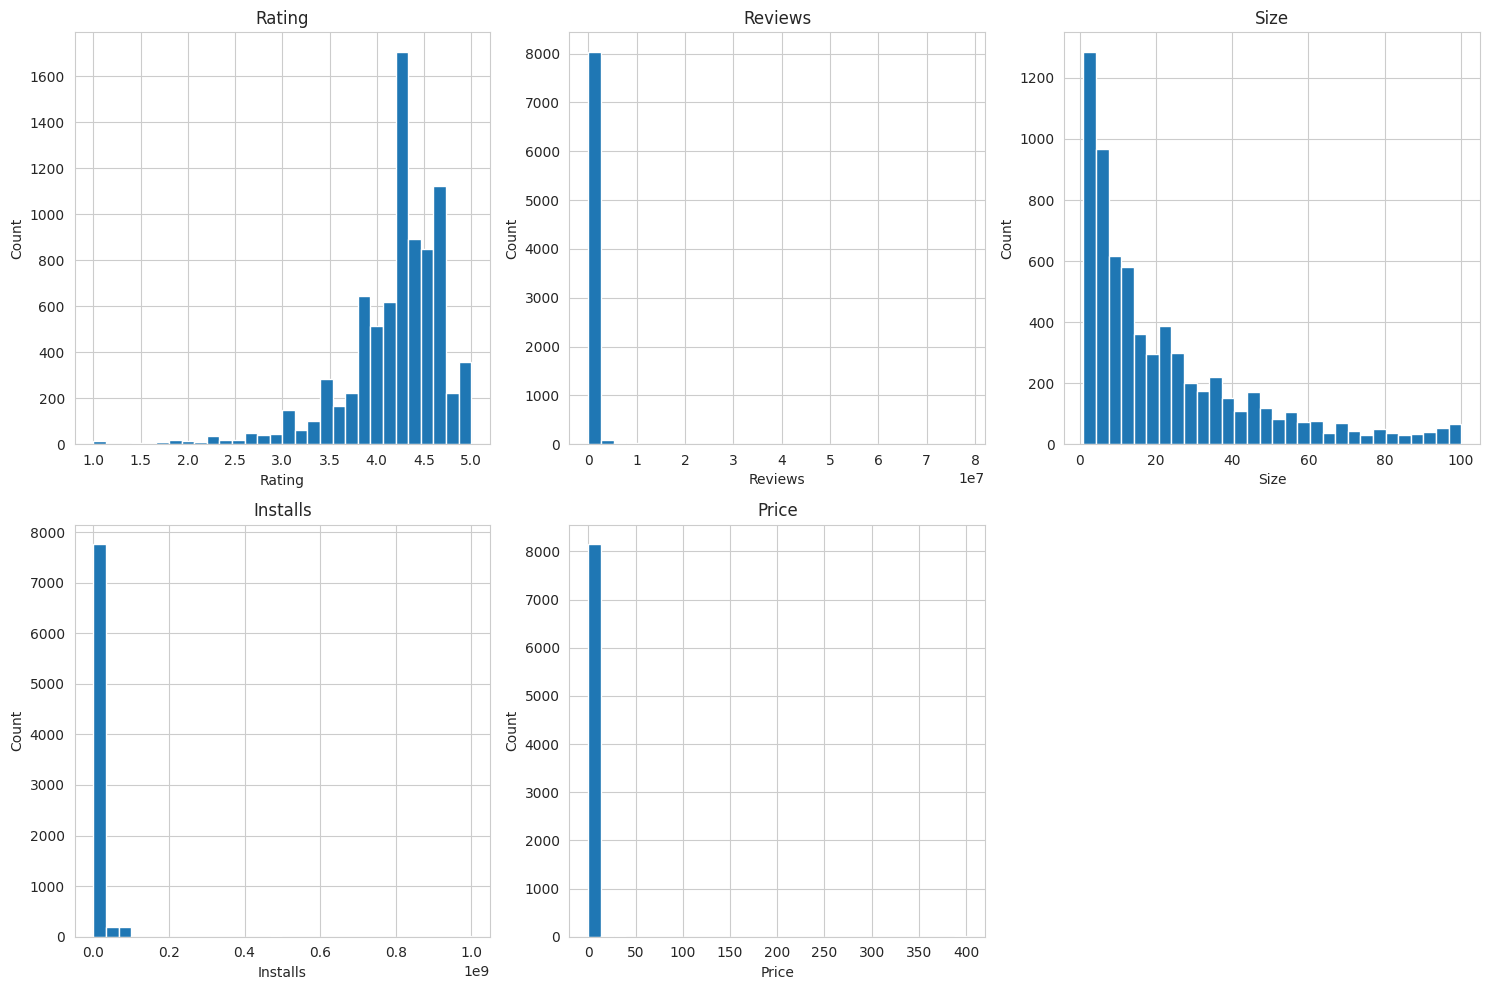

In [ ]:
def print_histograms(dataset):
    numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    axs = axs.flatten()
    for i, col in enumerate(numerical_cols):
        if col in dataset.columns:
            axs[i].hist(dataset[col], bins=30)
            axs[i].set_title(col)
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Count')
    axs[-1].axis('off')
    plt.tight_layout()
    plt.show()
print_histograms(clean_dataset)

The visualizations show the distribution of the numerical columns in the dataset.

The histogram for the "Rating" column shows that the majority of the apps have a rating between 4 and 5, with very few apps having a rating lower than 3.

The histogram for the "Reviews" column shows that the majority of the apps have a low number of reviews, where there are a few very popular apps with a very high number of reviews, and a large number of less popular apps with relatively few reviews. 

The histogram for the "Size" column shows that the majority of the apps have a size between 0 and 50 MB, with very few apps having a size greater than 100 MB.

The histogram for the "Installs" column shows that the majority of the apps have a low number of installs, with a long tail of apps having a high number of installs.

The histogram for the "Price" column shows that the majority of the apps are free, where the majority of the apps fall in the lower price range, while a few apps have a much higher price.

In [ ]:
def compute_correlations_matrix(dataset):
    corr_matrix = dataset.corr(numeric_only=True)
    return corr_matrix
compute_correlations_matrix(clean_dataset)

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055076,0.054698,0.040131,-0.021215
Reviews,0.055076,1.000000,0.178738,0.624050,-0.007791
Size,0.054698,0.178738,1.000000,0.128702,-0.024971
Installs,0.040131,0.624050,0.128702,1.000000,-0.009656
Price,-0.021215,-0.007791,-0.024971,-0.009656,1.000000


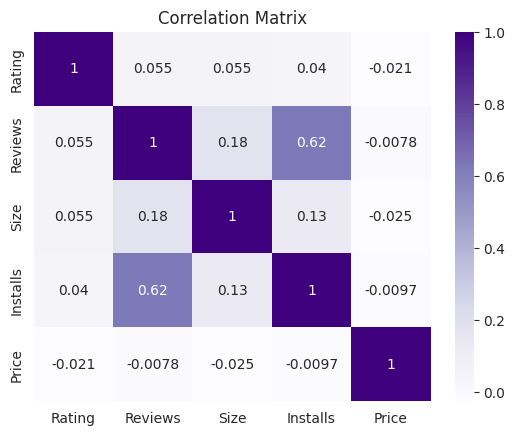

In [ ]:
# Create the correlation matrix
corr_matrix = compute_correlations_matrix(clean_dataset)
# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Purples')
plt.title('Correlation Matrix')
plt.show()

Rating has a weak positive correlation with Reviews, Size, and Installs, indicating that as these variables increase, Rating tends to increase slightly as well.

Reviews have a moderate positive correlation with Installs, indicating that as the number of Installs increase, Reviews tend to increase as well.

Size has a weak positive correlation with Reviews and Installs, indicating that as these variables increase, Size tends to increase slightly as well.

Price has a weak negative correlation with Rating, indicating that as Price increases, Rating tends to decrease slightly. There is also a weak negative correlation between Price and Size, indicating that as Size increases, Price tends to decrease slightly.

Overall, the correlations are relatively weak, indicating that the variables in the dataset are not strongly correlated with each other.

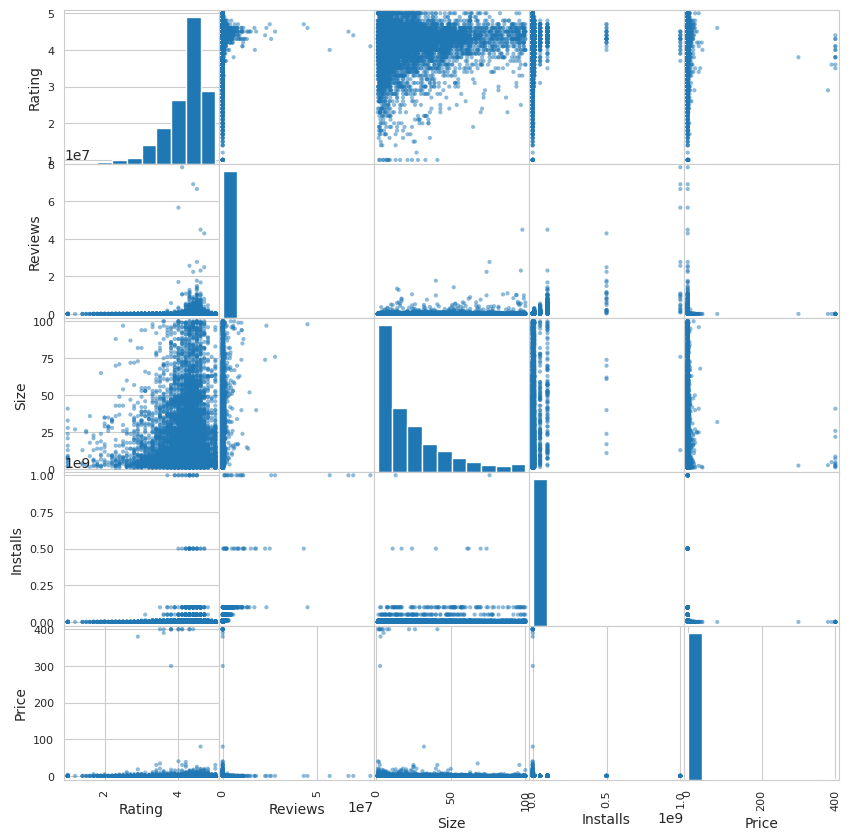

In [ ]:
def print_scatter_matrix(dataset):
    numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
    scatter_matrix(dataset[numerical_cols], figsize=(10,10))
    plt.show()
print_scatter_matrix(clean_dataset)

# Top 10 Most Popular Paid Apps in Family Category

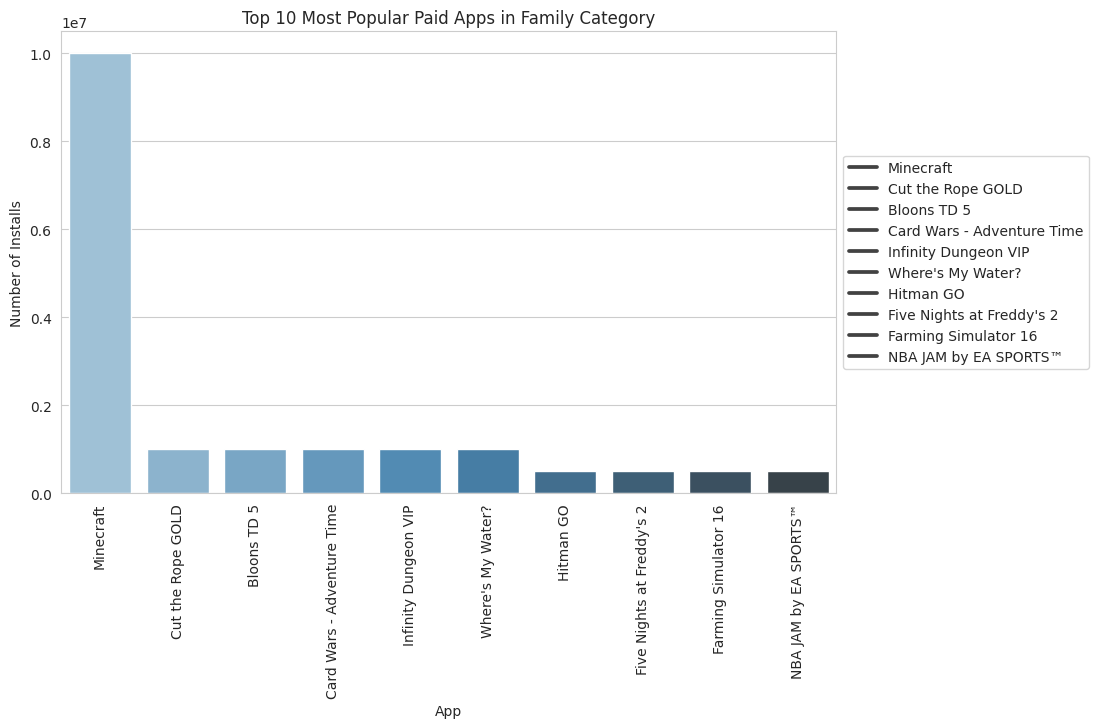

In [ ]:
# Filter dataset by Family category and paid apps
family_paid = clean_dataset[(clean_dataset['Category'] == 'FAMILY') & (clean_dataset['Type'] == 'Paid')]

# Sort by Installs in descending order
family_paid = family_paid.sort_values('Installs', ascending=False)

# Select the 10 most popular apps
top_10 = family_paid[:10]

# Create bar chart using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='App', y='Installs', data=top_10, palette='Blues_d')
plt.title('Top 10 Most Popular Paid Apps in Family Category')
plt.xlabel('App')
plt.ylabel('Number of Installs')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend(labels=top_10['App'], loc='center left', bbox_to_anchor=(1, 0.5))

# Show chart
plt.show()

In [ ]:
# Filter dataset by Family category and paid apps
family_paid = clean_dataset[(clean_dataset['Category'] == 'FAMILY') & (clean_dataset['Type'] == 'Paid')]

# Sort by Installs in descending order
family_paid = family_paid.sort_values('Installs', ascending=False)

# Select the 10 most popular apps
top_10 = family_paid[:10]

# Create horizontal bar chart with reversed y-axis
fig = px.bar(top_10, x='Installs', y='App', orientation='h',
             color='App',
             title='Top 10 Most Popular Paid Apps in Family Category')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

We plotted a bar diagram to visualize the top 10 most popular paid apps in the Family category. 

From our analysis of the dataset, we found out that the most popular paid app in the Family category is 'Minecraft'.
Minecraft has over ten million installs, followed by 'Cut the Rope GOLD', 'Bloons TD 5', 'Card Wars - Adventure Time', 'Infinity Dungeon VIP', and 'Where's My Water?' with over one million installs each.

# Top 10 most popular genres according to the number of installations from paid family

In [ ]:
# 1. Filter the dataset to only include paid family apps
paid_family = clean_dataset[(clean_dataset['Category'] == 'FAMILY') & (clean_dataset['Type'] == 'Paid')]

# 2. Group the filtered dataset by genre and sum the number of installs for each genre
genre_installs = paid_family.groupby('Genres')['Installs'].sum()

# 3. Sort the resulting series by the number of installs in descending order
genre_installs = genre_installs.sort_values(ascending=False)

# 4. Take the top 10 genres with the highest number of installs and plot them in a pie chart using Plotly
top_genres = genre_installs[:10]
fig = px.pie(values=top_genres, names=top_genres.index, title='Top 10 Genres by Installs for Paid Family Apps', hole=.5, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

As the chart shows, Arcade and Action & Adventure is the most popular genre, accounting for over 10 million downloads, or 51.9% of the total. Role Playing is the second most popular genre, with approximately 2 million downloads (10.2%), followed closely by Puzzle with almost 2 million downloads (9.97%). The other genres make up the remaining 28.93% of the total installations.

# *Analysing the number of Installations per Category*

In [ ]:
# Group the dataset by category and sum the number of installs for each category
category_installs = clean_dataset.groupby('Category')['Installs'].sum().reset_index()
top_category = category_installs.nlargest(10, 'Installs')

# Create a pie chart
fig = px.pie(top_category, values='Installs', names='Category', 
             title='Number of Installations per Category', hole=0.5,
             color_discrete_sequence=px.colors.qualitative.Dark2)

# Show the chart
fig.show()

Based on this chart, we can see that the top categories with the highest number of installations are 'GAME', 'COMMUNICATION', and 'TOOLS', followed by 'PRODUCTIVITY', 'SOCIAL', 'PHOTOGRAPHY', and 'FAMILY'. On the other hand, categories such as 'PARENTING', 'BEAUTY', and 'EVENTS' have the lowest number of installations.

**Analysing the mean price per category**

In [ ]:
# Calculate the mean price for each category
mean_price = clean_dataset.groupby('Category')['Price'].mean().reset_index()

# Sort the mean_price dataframe by price in ascending order
mean_price = mean_price.sort_values(by='Price').round(2)
top_result = mean_price.nlargest(10, 'Price')

# Create a bar chart using Plotly Express
fig = px.bar(top_result, x='Category', y='Price', color='Category',
             color_discrete_sequence=px.colors.qualitative.Dark2,
             text='Price')

# Set the title and axis labels
fig.update_layout(title='Mean Price per Category',
                  xaxis_title='Category',
                  yaxis_title='Price (in USD)')

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Set the text position to "auto" to show the values on top of the bars
fig.update_traces(textposition='auto')

# Show the plot
fig.show()

**Most expensive apps per category**

In [ ]:
# Filter the dataset to only include paid apps
paid_apps = clean_dataset[clean_dataset['Type'] == 'Paid']

# Group the paid apps dataset by category and get the most expensive app in each category
most_expensive = paid_apps.groupby('Category')['Price'].max().reset_index()

# Sort the most expensive apps by price in ascending order and select only the top 10 per category
most_expensive = most_expensive.sort_values('Price', ascending=True).groupby('Category').head(10)

# Create a bar chart using Plotly Express
fig = px.bar(most_expensive, x='Category', y='Price', color='Category',
             color_discrete_sequence=px.colors.qualitative.Dark2, text='Price')

# Set the title and axis labels
fig.update_layout(title='Most Expensive App per Category',
                  xaxis_title='Category',
                  yaxis_title='Price (in USD)')

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Set the text position to "auto" to show the values on top of the bars
fig.update_traces(textposition='auto')

# Show the plot
fig.show()

In [ ]:
# Group the dataset by content rating and sum the number of installs for each rating
content_rating_installs = clean_dataset.groupby('Content Rating')['Installs'].sum().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(content_rating_installs, x='Content Rating', y='Installs',
             color='Content Rating', color_discrete_sequence=px.colors.qualitative.Dark2)

# Set the title and axis labels
fig.update_layout(title='Number of Installs by Content Rating',
                  xaxis_title='Content Rating',
                  yaxis_title='Number of Installs')

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

Google Play Store offers various applications for Android users with different content ratings. The content rating of an app indicates its suitability for different age groups. The content ratings range from Everyone, Everyone 10+, Teen, Mature 17+, and Adults only 18+.
This suggests that the majority of apps in the store are suitable for users of all ages.

In [ ]:
# Group the dataset by content rating and category, and calculate the count of installations for each group
install_counts = clean_dataset.groupby(['Content Rating', 'Category'])['Installs'].count().reset_index()

# Use Plotly Express to create a bar chart
fig = px.bar(install_counts, x='Content Rating', y='Installs', color='Category', 
             title='Content Rating vs. Category by Installations')

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

In [ ]:
# Group the dataset by content rating and category, and calculate the count of installations for each group
install_counts = clean_dataset.groupby(['Content Rating', 'Category'])['Installs'].count().reset_index()

# Create a subplot for each content rating
fig = make_subplots(rows=3, cols=2, subplot_titles=install_counts['Content Rating'].unique())

# Loop through each content rating and create a grouped bar chart for each
for i, content_rating in enumerate(install_counts['Content Rating'].unique()):
    # Filter the data to only include the current content rating
    data = install_counts[install_counts['Content Rating'] == content_rating]
    # Create a grouped bar chart trace
    trace = go.Bar(x=data['Category'], y=data['Installs'], name=content_rating)
    # Add the trace to the subplot
    fig.add_trace(trace, row=(i//2)+1, col=(i%2)+1)
    
# Update the layout
fig.update_layout(title='Content Rating vs. Category by Installations',
                  xaxis=dict(title='Category'),
                  yaxis=dict(title='Installations'),
                  showlegend=True,
                  height=900)
                  
# Show the plot
fig.show()

However, when we look at the distribution of content ratings across different categories, we see some interesting trends. For example, the Game, Tools and Family categories have a higher proportion of apps rated for Everyone, while the Game and Family categories have a higher proportion of apps rated for Teen.

In [ ]:
# Group the dataset by category and content rating, and calculate the count of apps for each group
content_counts = clean_dataset.groupby(['Category', 'Content Rating'])['App'].count().reset_index()

# Use Plotly Express to create a stacked bar chart
fig = px.bar(content_counts, x='Category', y='App', color='Content Rating', 
             title='Distribution of Content Ratings Across App Genres', barmode='stack')

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

This creates a stacked bar chart where each bar represents an app genre, and the height of each segment within the bar corresponds to the number of apps with a particular content rating within that genre. The different colors in each bar correspond to the different content ratings (e.g., Everyone, Teen, Mature 17+).

In [ ]:
# Use Plotly Express to create a scatter plot
fig = px.scatter(clean_dataset, x='Reviews', y='Installs', color='Category',
                 title='Correlation between Reviews and Installs by Category')

# Set the x and y-axis scales to logarithmic
fig.update_layout(xaxis_type='log', yaxis_type='log')

# Show the plot
fig.show()

In conclusion, this analysis of the Google Play Store dataset has provided insights into the distribution of app ratings, the relationship between app installs and reviews, and the popularity of certain paid apps and genres. This information could be useful to developers looking to create new apps or improve existing ones.